<a href="https://colab.research.google.com/github/dk-wei/viz-storytelling/blob/main/Plot_with_(mainly)_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前言

其实很多情况下没必要用什么`matplotlib`和`seaborn`，直接用pandas的plot
就很够用了，还有很重要的一点，作图你得告诉based data到底是个什么样子，不然就放张图，鬼才知道啥意思。

- Realpython viz tutorial 链接：https://realpython.com/pandas-plot-python/
- Mode python tutorial: https://mode.com/python-tutorial/python-tutorial-conclusion/
- From data to viz: https://www.data-to-viz.com/
- Python viz gallery: https://python-graph-gallery.com/


到底选啥图？

参考链接：https://python-graph-gallery.com/

![](https://miro.medium.com/max/1400/1*JxbqIQmD_E3M3I7Tjo0OqA.jpeg)

# 正文

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


download_url = (
"https://raw.githubusercontent.com/fivethirtyeight/"
"data/master/college-majors/recent-grads.csv"
)

df = pd.read_csv(download_url)

In [ ]:
pd.set_option("display.max.columns", None)

In [ ]:
df.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [ ]:
df.shape

(173, 21)

貌似这个数据集主要介绍的是每个major的就业以及收入情况

In [ ]:
%matplotlib inline

# Numeric data

## Line Chart (x-y)

看趋势，trend


In [ ]:
df[["Rank", "P25th", "Median", "P75th"]].head()

,Rank,P25th,Median,P75th
0,1,95000,110000,125000
1,2,55000,75000,90000
2,3,50000,73000,105000
3,4,43000,70000,80000
4,5,50000,65000,75000


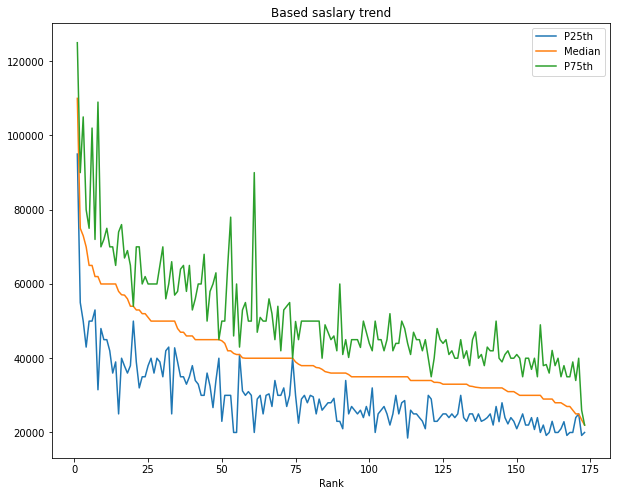

In [ ]:
df.plot(x="Rank", 
        y=["P25th", "Median", "P75th"],
        title='Based saslary trend',
        figsize=[10,8]
        )

## Hist Chart

针对numerica data，看一个或者多个group的分布-distribution, 看outlier

(最大的问题是一旦数据多的时候，特别慢)

Histograms show the frequency distribution of continuous data using rectangles. It is similar in appearance to a bar graph, however, the bars are adjacent. Data is split into intervals and the frequency of instances in each interval is plotted. It can tell us about the distribution of a graph (i.e. normal or not), its skewness, and lets us know about presence of outliers.

In [ ]:
df['Median']

0      110000
1       75000
2       73000
3       70000
4       65000
        ...  
168     26000
169     25000
170     25000
171     23400
172     22000
Name: Median, Length: 173, dtype: int64

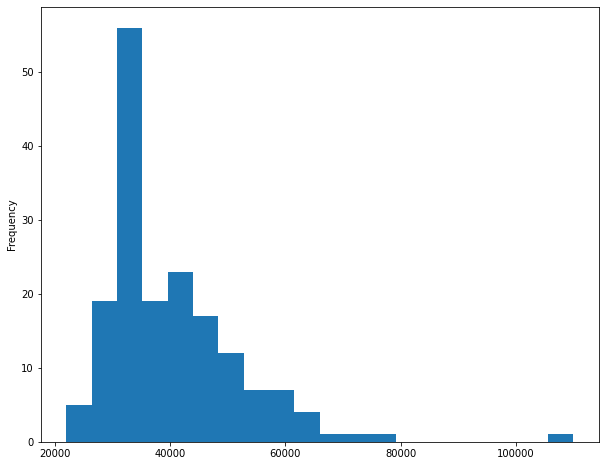

In [ ]:
df['Median'].plot(kind="hist", bins=20, figsize=[10,8])

**自定义bin values**

In [ ]:
bin_values = np.arange(start=df['Median'].min(), stop=df['Median'].max(), step=1000)

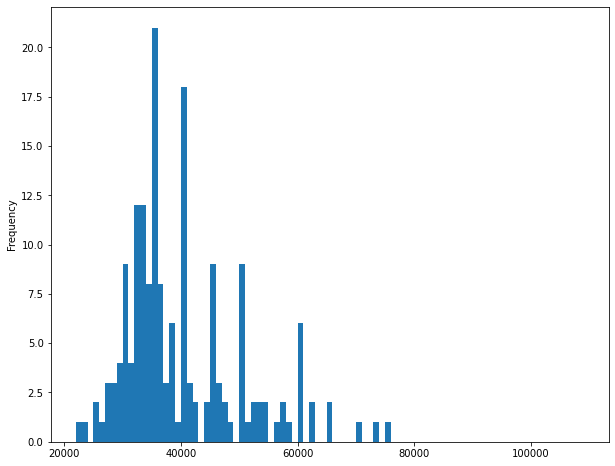

In [ ]:
df['Median'].plot(kind="hist", bins=bin_values, figsize=[10,8])

## Hist Chart (Duo-Col)

两个distribution放一张图，便于比较, 适当降低图像alpha

In [ ]:
df[['Median', 'P75th']].head()

,Median,P75th
0,110000,125000
1,75000,90000
2,73000,105000
3,70000,80000
4,65000,75000


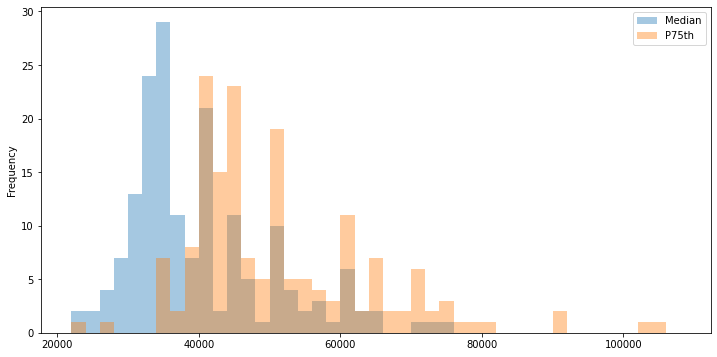

In [ ]:
bin_values = np.arange(start=df['Median'].min(), stop=df['Median'].max(), step=2000)

df[['Median', 'P75th']].plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True)

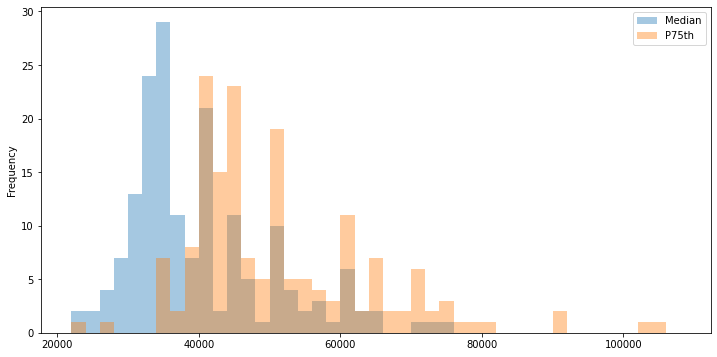

In [ ]:
bin_values = np.arange(start=df['Median'].min(), stop=df['Median'].max(), step=2000)

df[['Median', 'P75th']].plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True)

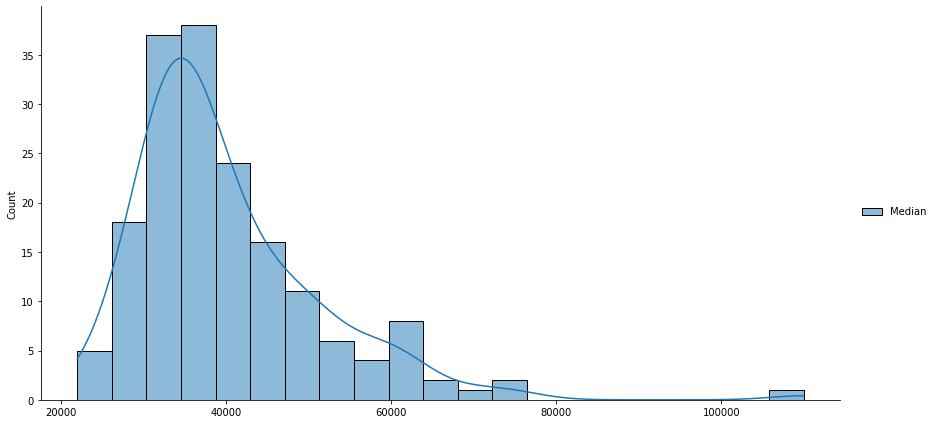

In [ ]:
# dist + kde 可以看到both distribution和binned distribution，看到每个区间到底有多少
sns.displot(df[['Median']], kde=True, height=6, aspect=2)

## Density Chart (kde)

针对numerica data，Density plot专门用于查看numeric data的分布，尤其是Kernel Density Estimate (kde) plot。 同样是观察distribution，如果觉得histagram 乱七八糟看不明白，只是想看个大概，kde图会更快更好

In [ ]:
df[['Median', 'P75th']].head()

,Median,P75th
0,110000,125000
1,75000,90000
2,73000,105000
3,70000,80000
4,65000,75000


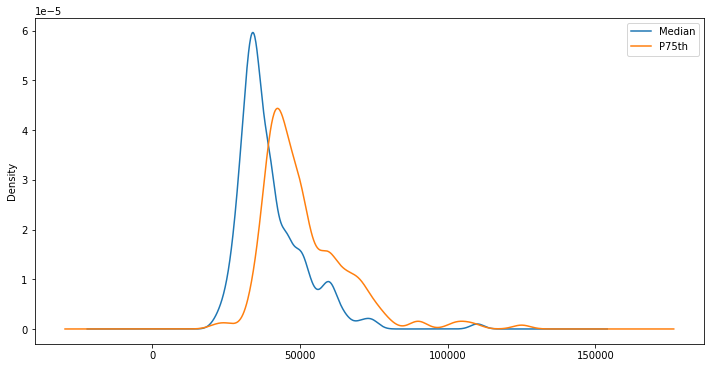

In [ ]:
df[['Median', 'P75th']].plot.kde(figsize=[12,6], bw_method=0.2, legend=True)

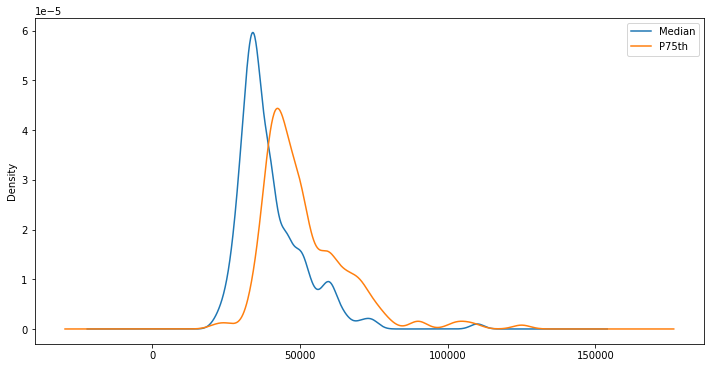

In [ ]:
df[['Median', 'P75th']].plot(kind='kde', figsize=[12,6], bw_method=0.2, legend=True)

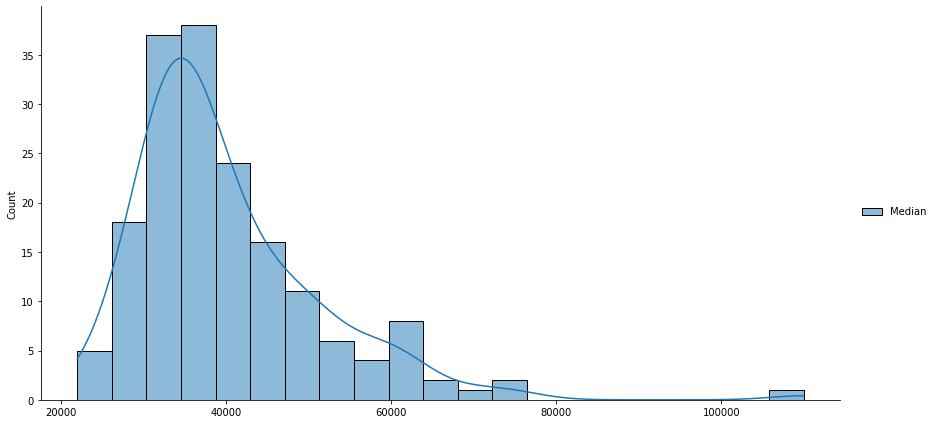

In [ ]:
sns.displot(df[['Median']], kde=True, height=6, aspect=2)

## Box Chart

看各个group的percentile, outlier 的情况，很多组放在一块儿看效果更佳

A boxplot is a standardized way of displaying the distribution of data based on the following: Minimum, First Quartile, Median, Third Quartile, and Maximum. Each box on the plot shows the range of values from the first quartile at the bottom of the box to the third quartile at the top of the box. A line in the middle of the box occurs at the median of all the values. Whiskers on the plot display the maximum and minimum. It gives information about variability and dispersion of data. It also displays outliers and tells us about the symmetry and skewness of the data.

In [ ]:
df[['Median', 'P75th']].head()

,Median,P75th
0,110000,125000
1,75000,90000
2,73000,105000
3,70000,80000
4,65000,75000


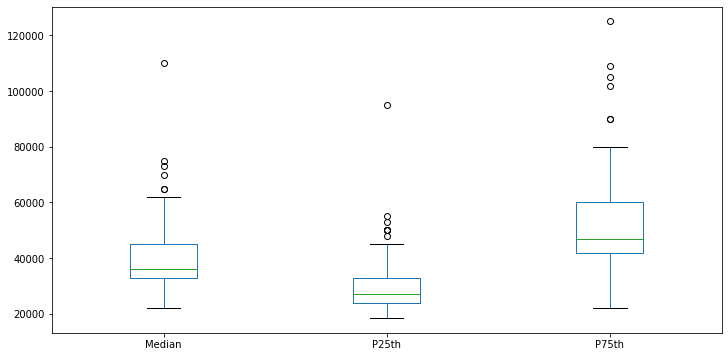

In [ ]:
df[['Median', 'P25th', 'P75th']].plot(kind='box',figsize=[12,6])

## Violin Chart

看各个group的percentile, outlier 的情况，很多组放在一块儿看效果更佳, 比box plot还佳

官方文档：https://seaborn.pydata.org/generated/seaborn.violinplot.html

In [ ]:
# library & dataset
import seaborn as sns
violin_df = sns.load_dataset('iris')
 
violin_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


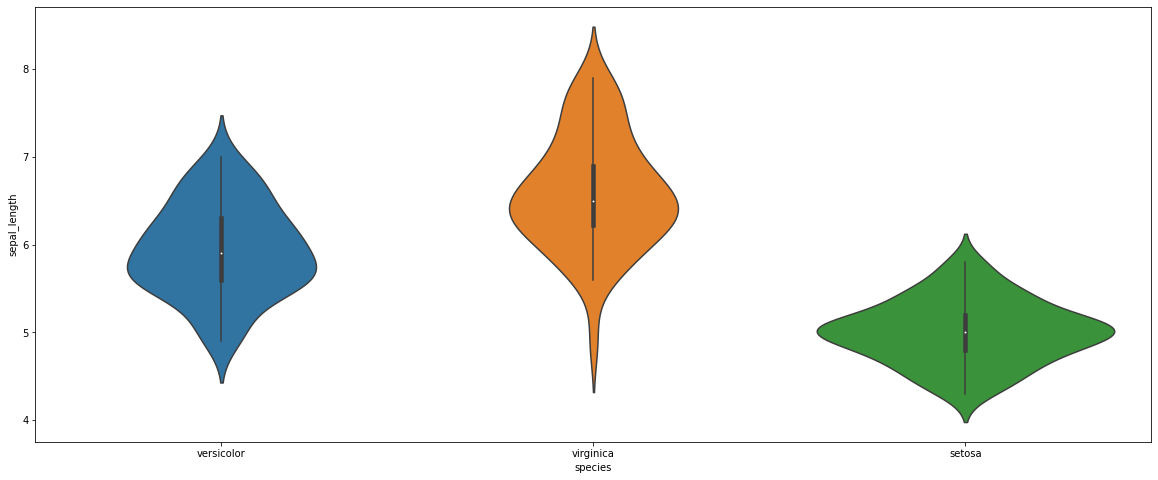

In [ ]:
# plot
plt.figure(figsize=(20,8))

g = sns.violinplot(x='species', 
               y='sepal_length', 
               data=violin_df, 
               order=[ "versicolor", "virginica", "setosa"]
               )

## Dot Plot

来源1：[Dot Plot – An Alternative to Column/Bar Charts](https://visualbi.com/blogs/sap/sap-businessobjects/sap-lumira-designer/dot-plot-alternative-column-bar-charts/)    
来源2：[Dot Plots in Python](https://plotly.com/python/dot-plots/)    


点点图有时候比bar chart要直观的多，特别是在做比较的时候。

Introduced by William Cleveland, the dot plot is a type of graph where each of the data points are marked by a dot which help interpret and compare values for each of the categorical variables.

As seen from the below example, it easy to read and compare dots on a line as they provide a much cleaner look and have a high data ink ratio as compared to the column /bar chart. The Dots of subsets are assigned with distinct colors or shapes, making them easily distinguishable. For comfortable viewing a dot plot can accommodate anywhere between 1-4 dots on a line beyond which it would look cluttered. This becomes especially useful when you have column or bar charts with 4 different measures all stacked against each other.

![](https://cdn.visualbi.com/wp-content/uploads/conversion.png)

In [ ]:
import plotly.express as px
import pandas as pd

schools = ["Brown", "NYU", "Notre Dame", "Cornell", "Tufts", "Yale",
           "Dartmouth", "Chicago", "Columbia", "Duke", "Georgetown",
           "Princeton", "U.Penn", "Stanford", "MIT", "Harvard"]
n_schools = len(schools)

men_salary = [72, 67, 73, 80, 76, 79, 84, 78, 86, 93, 94, 90, 92, 96, 94, 112]
women_salary = [92, 94, 100, 107, 112, 114, 114, 118, 119, 124, 131, 137, 141, 151, 152, 165]

df = pd.DataFrame(dict(school=schools*2, salary=men_salary + women_salary,
                       gender=["Men"]*n_schools + ["Women"]*n_schools))

df.head()

,school,salary,gender
0,Brown,72,Men
1,NYU,67,Men
2,Notre Dame,73,Men
3,Cornell,80,Men
4,Tufts,76,Men


In [ ]:


# Use column names of df for the different parameters x, y, color, ...
fig = px.scatter(df, x="salary", y="school", color="gender",
                 title="Gender Earnings Disparity",
                 labels={"salary":"Annual Salary (in thousands)"} # customize axis label
                )

fig.show()

In [ ]:
import plotly.graph_objects as go

# schools = ["Brown", "NYU", "Notre Dame", "Cornell", "Tufts", "Yale",
#            "Dartmouth", "Chicago", "Columbia", "Duke", "Georgetown",
#            "Princeton", "U.Penn", "Stanford", "MIT", "Harvard"]

fig = go.Figure()
fig.add_trace(go.Scatter(
    #x = [72, 67, 73, 80, 76, 79, 84, 78, 86, 93, 94, 90, 92, 96, 94, 112],
    x = men_salary,
    y=schools,
    marker=dict(color="crimson", size=12),
    mode="markers",
    name="Women",
))

fig.add_trace(go.Scatter(
    #x=[92, 94, 100, 107, 112, 114, 114, 118, 119, 124, 131, 137, 141, 151, 152, 165],
    x=women_salary,
    y=schools,
    marker=dict(color="gold", size=12),
    mode="markers",
    name="Men",
))

fig.update_layout(title="Gender Earnings Disparity",
                  xaxis_title="Annual Salary (in thousands)",
                  yaxis_title="School")

fig.show()

In [ ]:
import plotly.graph_objects as go

country = ['Switzerland (2011)', 'Chile (2013)', 'Japan (2014)',
           'United States (2012)', 'Slovenia (2014)', 'Canada (2011)',
           'Poland (2010)', 'Estonia (2015)', 'Luxembourg (2013)', 'Portugal (2011)']
voting_pop = [40, 45.7, 52, 53.6, 54.1, 54.2, 54.5, 54.7, 55.1, 56.6]
reg_voters = [49.1, 42, 52.7, 84.3, 51.7, 61.1, 55.3, 64.2, 91.1, 58.9]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=voting_pop,
    y=country,
    name='Percent of estimated voting age population',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line_color='rgba(156, 165, 196, 1.0)',
    )
))
fig.add_trace(go.Scatter(
    x=reg_voters, y=country,
    name='Percent of estimated registered voters',
    marker=dict(
        color='rgba(204, 204, 204, 0.95)',
        line_color='rgba(217, 217, 217, 1.0)'
    )
))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=16))

fig.update_layout(
    title="Votes cast for ten lowest voting age population in OECD countries",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

## Bar Chart (Vanilla)

看不同的group对比

In [ ]:
download_url = (
"https://raw.githubusercontent.com/fivethirtyeight/"
"data/master/college-majors/recent-grads.csv"
)

df = pd.read_csv(download_url)

In [ ]:
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


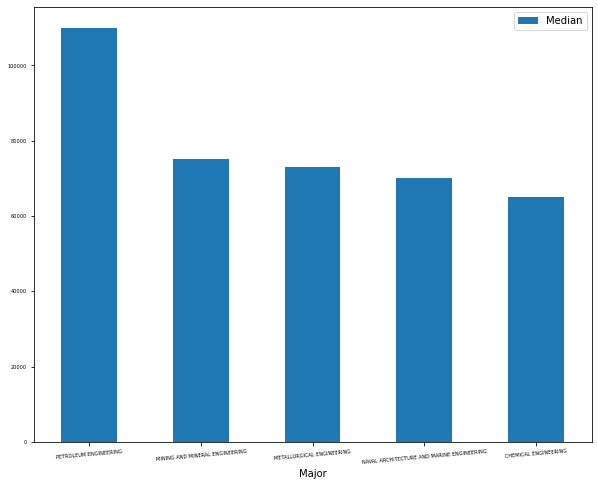

In [ ]:
top_5.plot(x="Major", 
           y="Median", 
           kind="bar", rot=5, fontsize=5, figsize=[10,8])

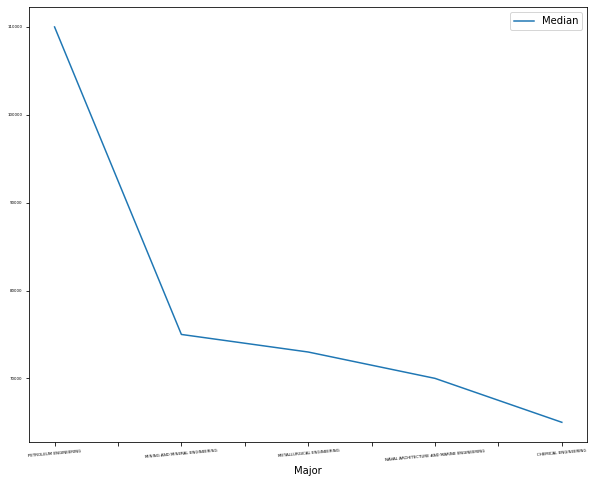

In [ ]:
# 看看不加kind变成了啥
top_5.plot(x="Major", y="Median", rot=5, fontsize=4, figsize=[10,8])

## Bar Chart (Horizontal)

看不同的group对比

In [ ]:
top_5

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


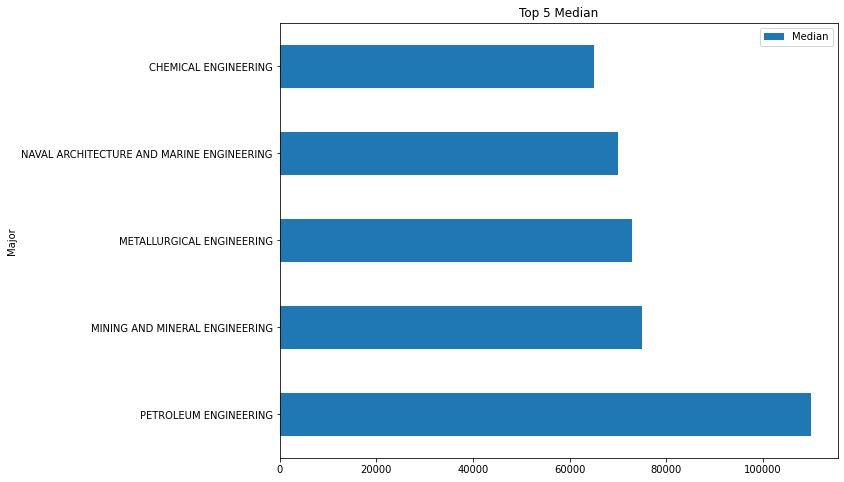

In [ ]:
top_5.plot(x="Major", 
           y="Median", 
           title='Top 5 Median',
           kind="barh",fontsize=10, figsize=[10,8])

## Bar Chart (Stackd)

看不同的group对比

In [ ]:
top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0


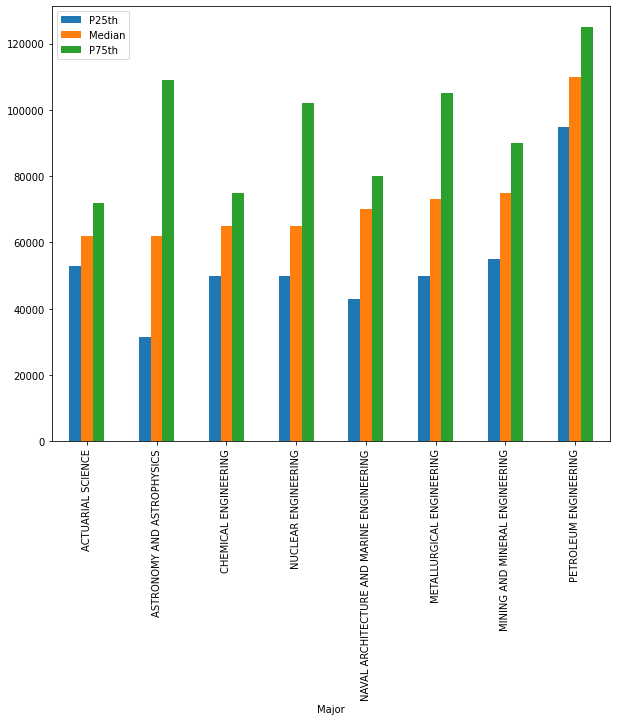

In [ ]:
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar", figsize=[10,8])

## Bar Chart (Stackd 2)

看正负不同的的group对比

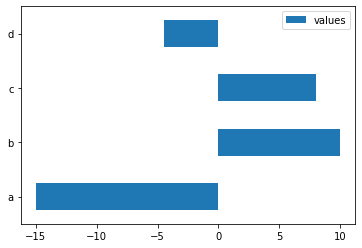

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame([[-15], [10], [8], [-4.5]],
                    index=['a', 'b', 'c', 'd'],
                    columns=['values'])
data.plot(kind='barh')

In [ ]:
data

,values
a,-15.0
b,10.0
c,8.0
d,-4.5


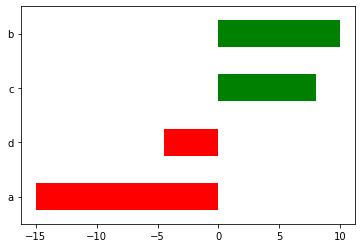

In [ ]:
data['positive'] = data['values'] > 0
data.sort_values('values',inplace=True)
data['values'].plot(kind='barh',
                    color=data.positive.map({True: 'g', False: 'r'}))

In [ ]:
words = ['upvoted', 'upvote', 'f***', 'reimer', 'feminists', 'censorship',
       'wet', '0001f914', 'turtle', '0001f602'] 

coefs = [ 
        0.69737316,  0.67902944,  0.6746799 ,  0.67338842,  0.6678747 ,
       -2.83723585, -2.82874502, -2.59032368, -2.52985115, -2.1811188 ,
       ]

In [ ]:
colors = [1 if c >= 0 else 0 for c in coefs]

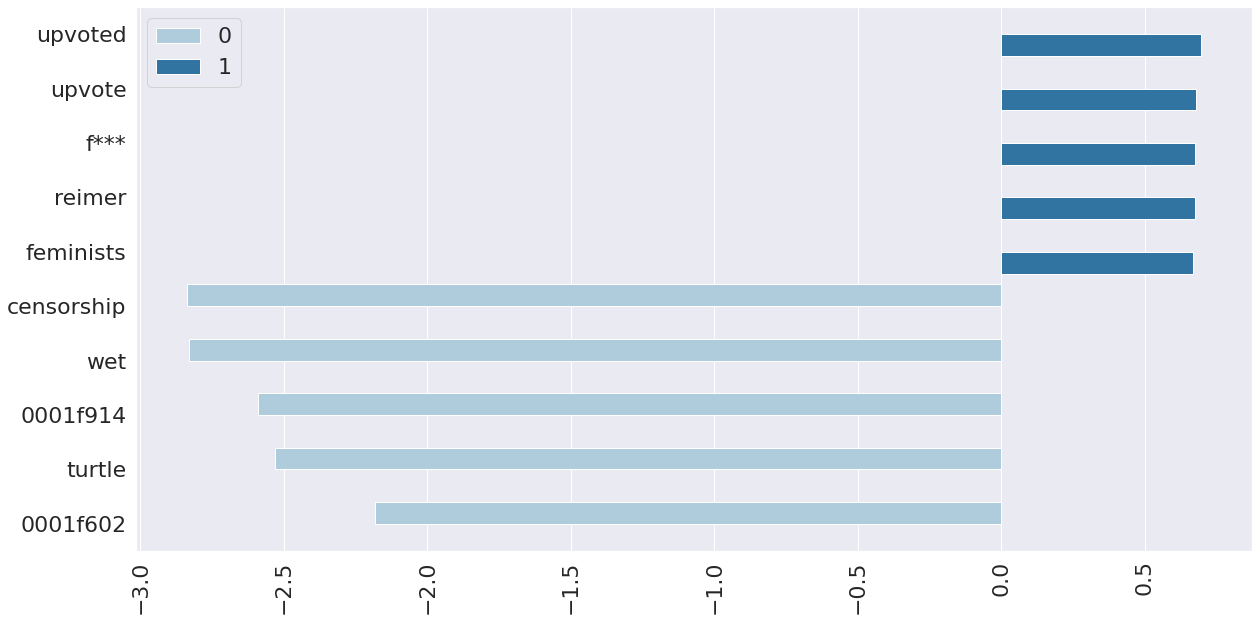

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale = 2)

g = sns.barplot(
    y=words,
    x=coefs,
    hue=colors, # Here I am!
    palette=sns.color_palette("Paired"), # Default palette is far better for it
    orient = 'h'   # 横向 bar chart，需x轴数字，y轴字母
)

plt.xticks(rotation=90)
plt.show()

## Bar Chart (Horizontal + Stackd)

看不同的group对比

In [ ]:
top_medians.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0


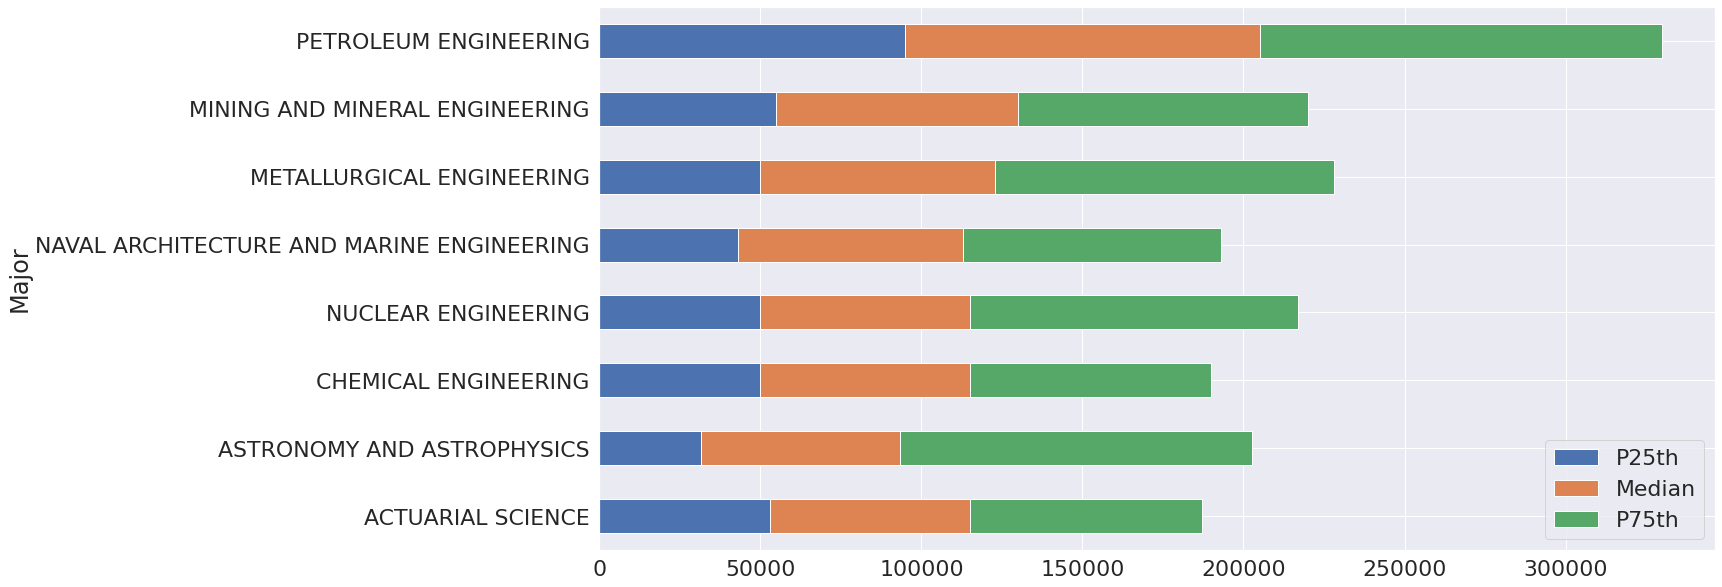

In [ ]:
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="barh", stacked=True,)

## Hexbin plot

看两组数据之间correlation  (当数据量巨大的时候比scatter plot优秀)

https://python-graph-gallery.com/84-hexbin-plot-with-matplotlib/

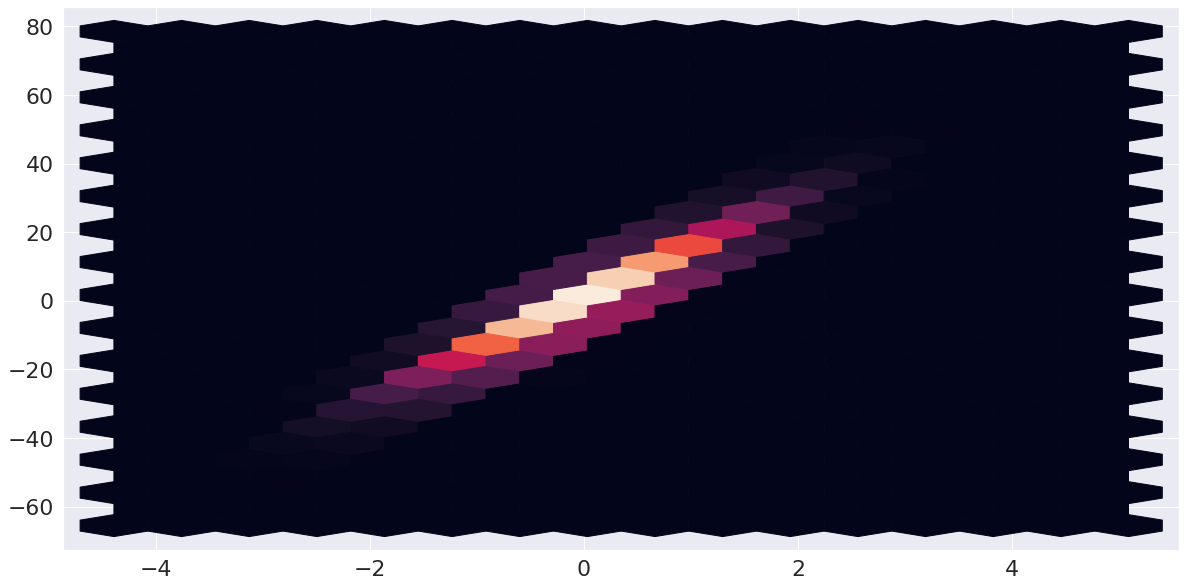

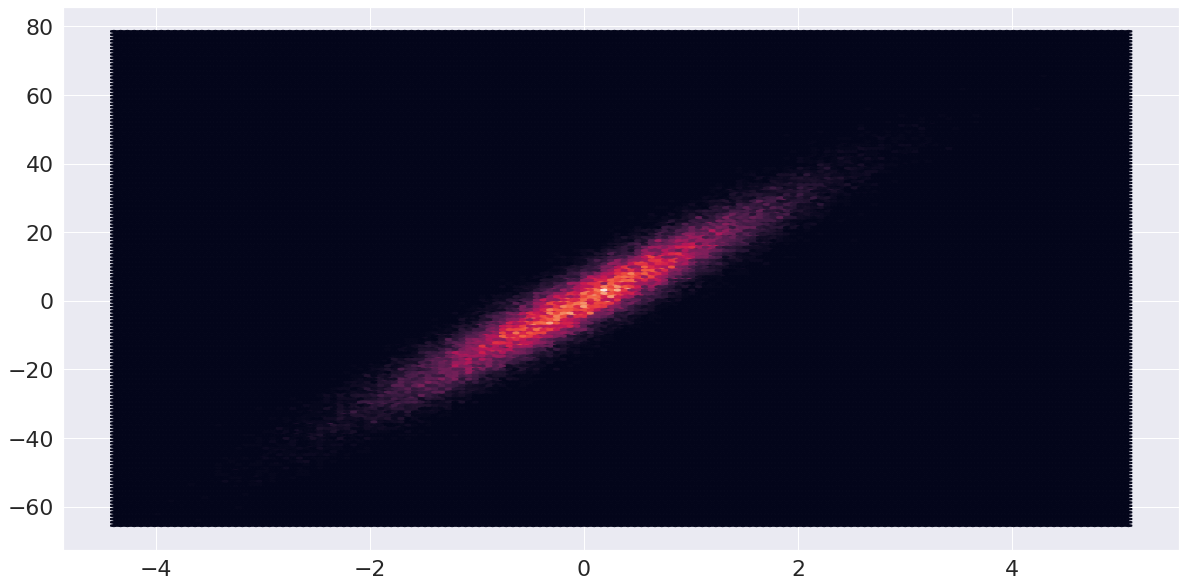

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = np.random.normal(size=50000)
y = (x * 3 + np.random.normal(size=50000)) * 5
 
# Make the plot
plt.hexbin(x, y, gridsize=(15,15) )
plt.show()
 
# We can control the size of the bins:
plt.hexbin(x, y, gridsize=(150,150) )
plt.show()


## Scatter Chart (Correlation & Regression)

看两组数据之间correlation

In [ ]:
df[['Median', 'Unemployment_rate']].head()

,Median,Unemployment_rate
0,110000,0.018381
1,75000,0.117241
2,73000,0.024096
3,70000,0.050125
4,65000,0.061098


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


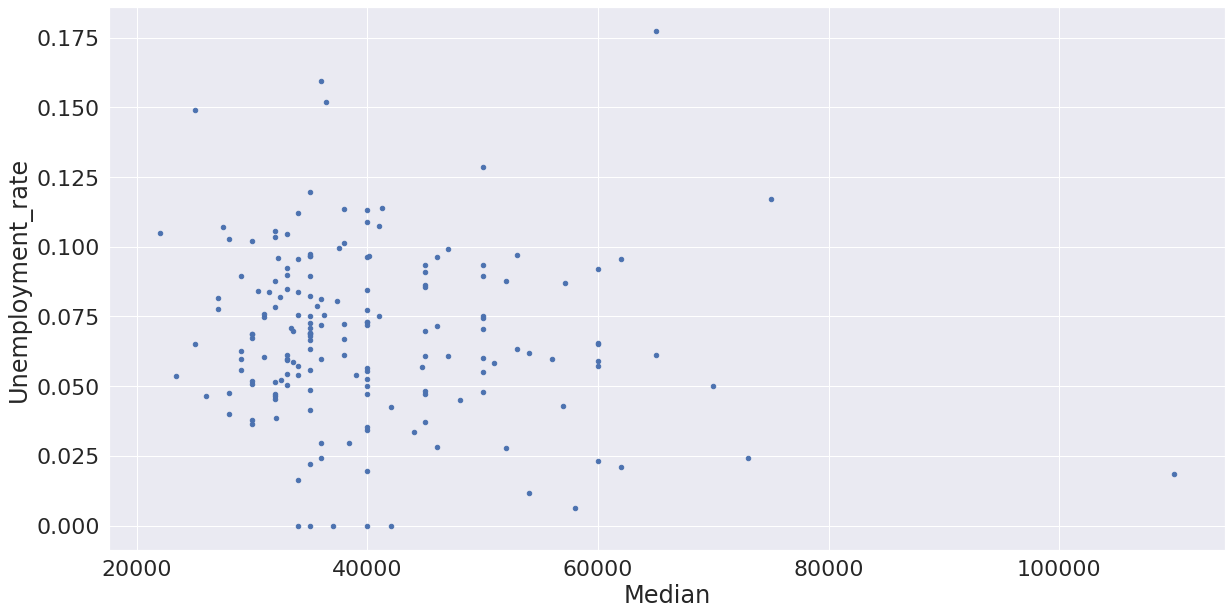

In [ ]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

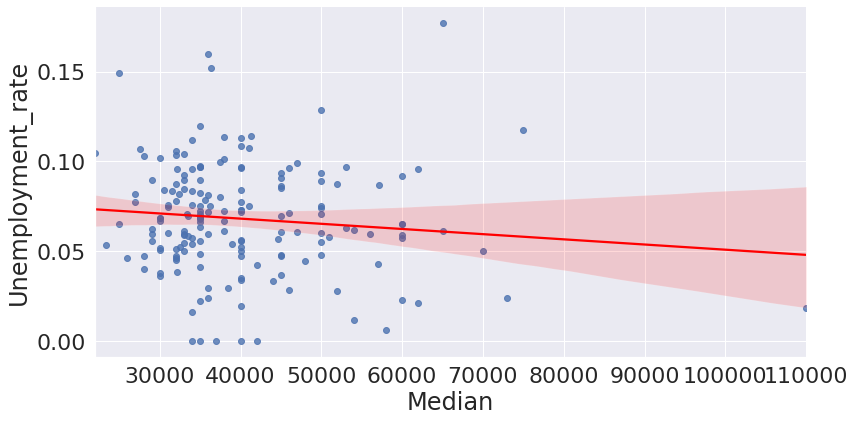

In [ ]:
# 有regression line版本
import seaborn as sns

sns.lmplot(x='Median',y='Unemployment_rate',data=df,fit_reg=True, height=6, aspect=2, line_kws = {'color':'red'} )

R-squared: 0.011845 Slope: -0.000000 P-value: 0.154059 



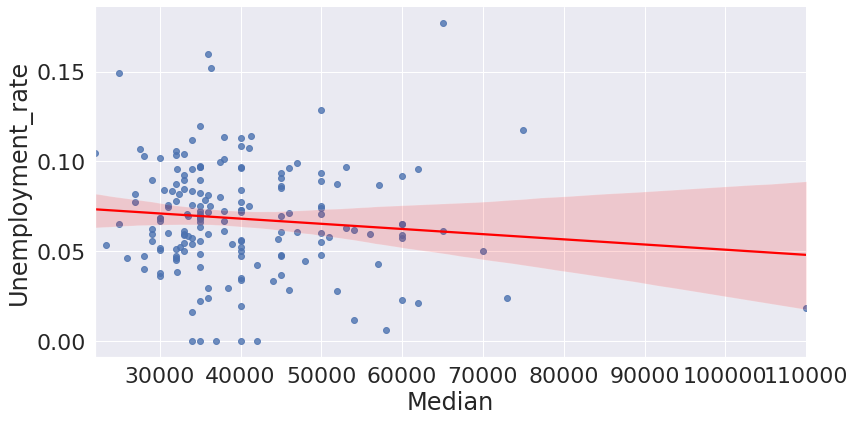

In [ ]:
# 带regression line以及回归数据版本
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

x = df['Median']
y = df['Unemployment_rate']

res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}", f"Slope: {res.slope:.6f}", f"P-value: {res.pvalue:.6f}", '\n')

sns.lmplot(x='Median',y='Unemployment_rate',data=df,fit_reg=True, height=6, aspect=2, line_kws = {'color':'red'} )

In [ ]:
# 附regression result

import statsmodels.formula.api as smf

mod = smf.ols(formula='Unemployment_rate ~ Median', data=df)

res = mod.fit()

res.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Intercept    7.974606e-02
Median      -2.877911e-07
dtype: float64

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      Unemployment_rate   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.050
Date:                Tue, 29 Jun 2021   Prob (F-statistic):              0.154
Time:                        20:46:46   Log-Likelihood:                 360.79
No. Observations:                 173   AIC:                            -717.6
Df Residuals:                     171   BIC:                            -711.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0797      0.008      9.502      0.0

## Scatter Chart (Distribution)

看concrete numerical 或者categorical feature每个group的ditribution情况     
例如我们想知道每个age和related bugs number的情况就可以参考下图

In [ ]:
california_housing = pd.read_csv('/content/sample_data/california_housing_train.csv')
california_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Text(0.5, 1.0, 'Visualization of housing age vs room number')

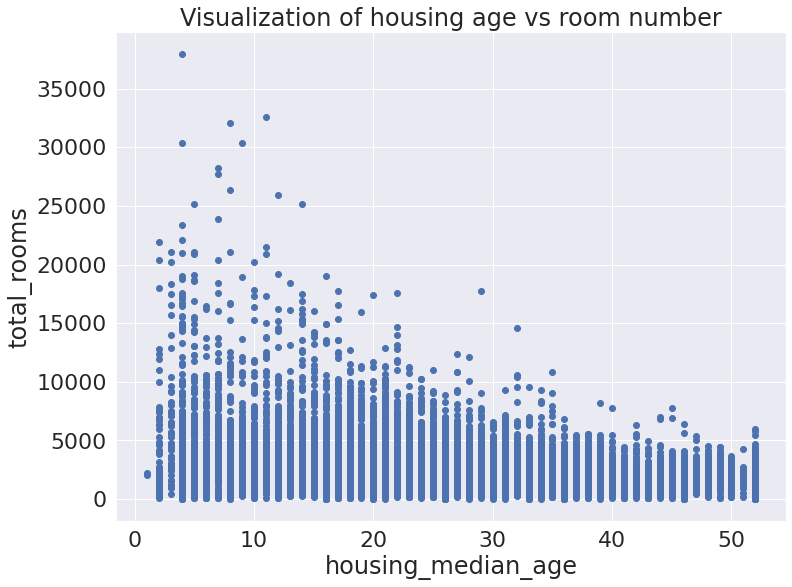

In [ ]:
plt.figure(figsize = (12, 9))
plt.scatter(california_housing['housing_median_age'], california_housing['total_rooms'])
plt.xlabel('housing_median_age')
plt.ylabel('total_rooms')
plt.title('Visualization of housing age vs room number')

## Scatter Chart (分label distribution)

看不同label数据之间correlation

In [ ]:
# library & dataset
import seaborn as sns
iris_df = sns.load_dataset('iris')
 
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


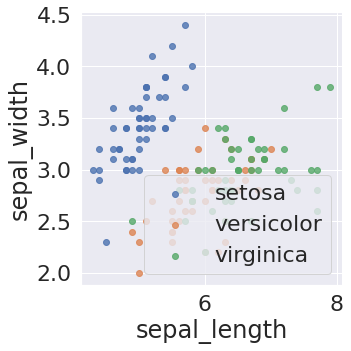

In [ ]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot(x="sepal_length", 
           y="sepal_width", 
           data=iris_df, 
           fit_reg=False, 
           hue='species',       #用不同的hue区分label
           legend=False
           )

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

## Histplot  

把scatter和hist，kde整一块儿，齐活，下面还有一个分label版本

参考1：https://stackoverflow.com/questions/51210955/seaborn-jointplot-add-colors-for-each-class      
参考2：https://python-graph-gallery.com/82-marginal-plot-with-seaborn/

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


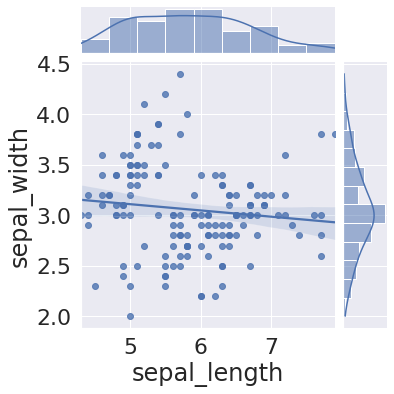

In [ ]:
g = sns.jointplot(x=iris_df["sepal_length"], 
              y=iris_df["sepal_width"], 
              kind='reg',
              scatter = True
              )

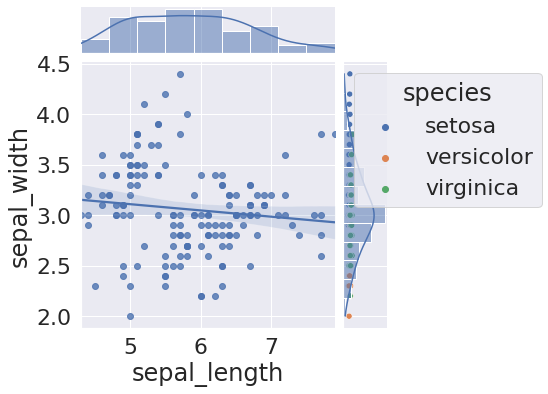

In [ ]:
# library & dataset
# import seaborn as sns
# df = sns.load_dataset('iris')
 
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=iris_df["sepal_length"], 
              y=iris_df["sepal_width"], 
              kind='reg'
              )

sns.scatterplot(x=iris_df["sepal_length"],     #要是分label，得画俩图
                y=iris_df["sepal_width"], 
                hue=iris_df['species'])
# sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex')
# sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde')

#sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)

## Heatmap

同样常用于查看feature的correlation

参考：https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

In [ ]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
 
# Create a dataset (fake)
heatmap = pd.DataFrame(df[["P25th", "Median", "P75th"]].corr())
heatmap

,P25th,Median,P75th
P25th,1.000000,0.891683,0.734491
Median,0.891683,1.000000,0.901923
P75th,0.734491,0.901923,1.000000


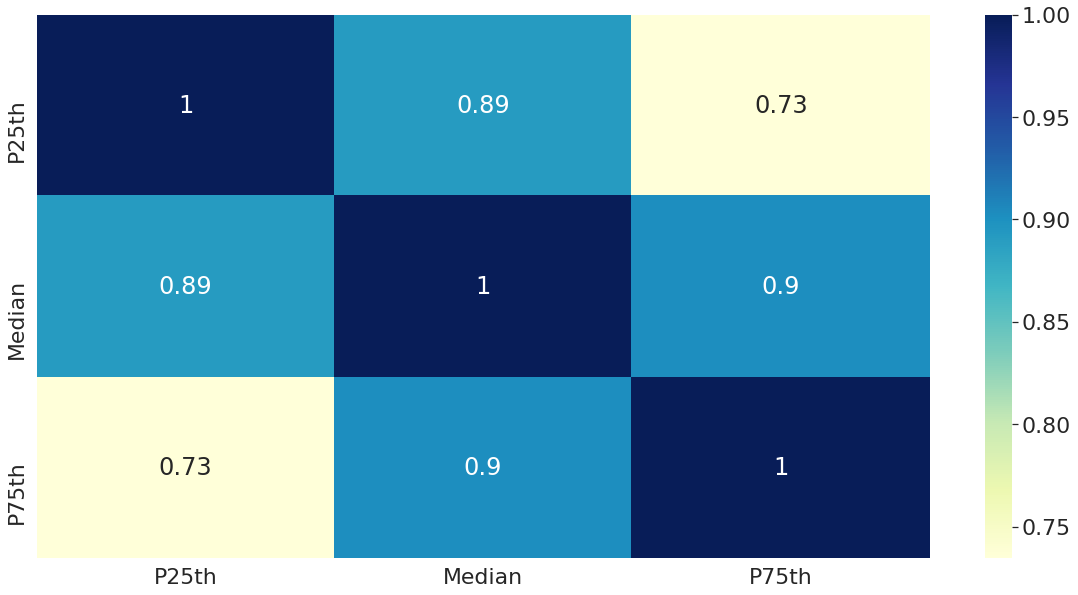

In [ ]:
# plot using a color palette
sns.heatmap(heatmap, cmap="YlGnBu", annot=True)
#sns.heatmap(df, cmap="RdYlBu")
# sns.heatmap(df, cmap="BuPu")
# sns.heatmap(df, cmap="Greens")
 
#add this after your favorite color to show the plot
#sns.plt.show()
plt.show()


## Pairplot

神图，比较了每组numeric feature之间的relationship，还带上了label，很关键的是我们能观察这些features到底是否seperabe，甚至linear seperable

In [ ]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns

iris_df = sns.load_dataset('iris')

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


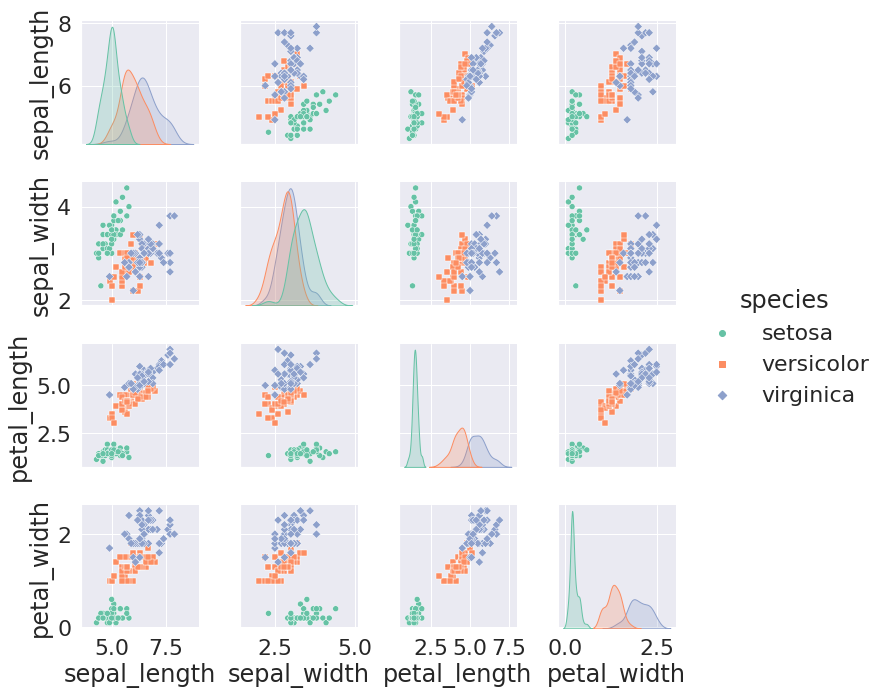

In [ ]:
# left
sns.pairplot(iris_df, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")
plt.show()
 

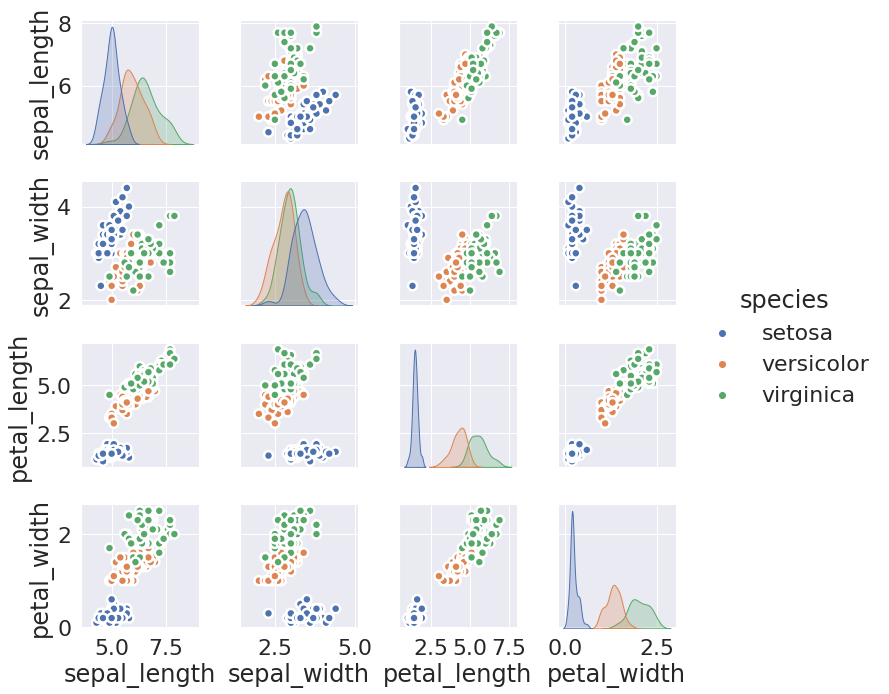

In [ ]:
# right: you can give other arguments with plot_kws.
sns.pairplot(iris_df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

## Linear Regression  Chart 


链接：https://seaborn.pydata.org/tutorial/regression.html


This is where the difference between `regplot()` and `lmplot()` appears. While `regplot()` always shows a single relationship, `lmplot()` combines `regplot()` with `FacetGrid` to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

作出scatter points的trend line，以及根据不同condition作出分group的trend line。

In [ ]:
sns.set_theme(color_codes=True)

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


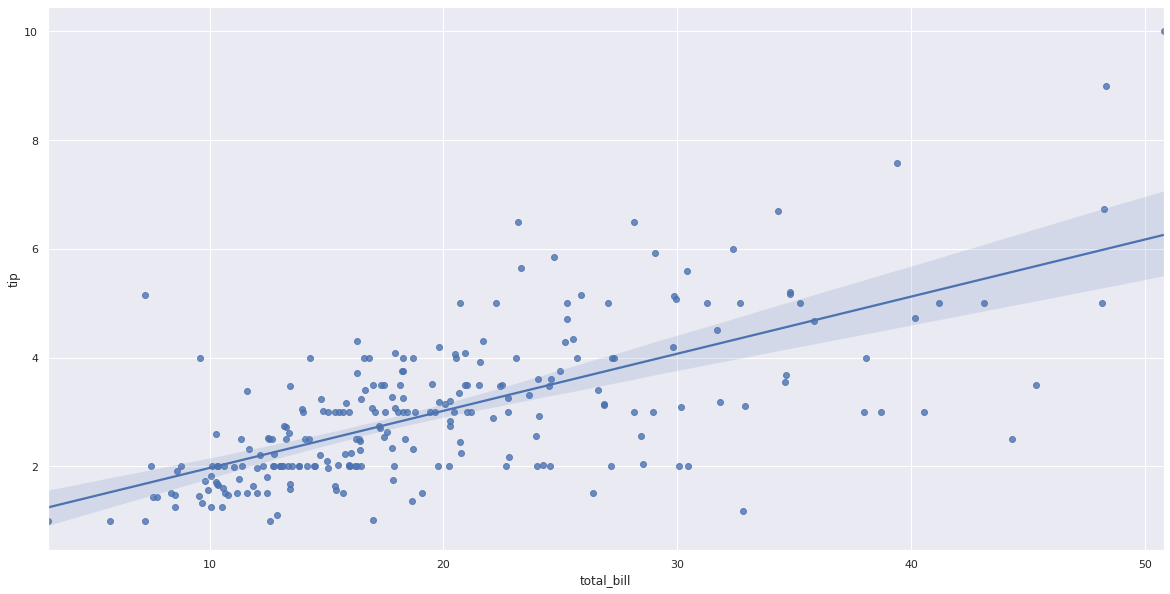

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips);

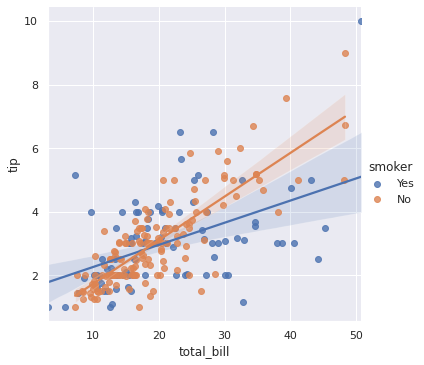

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

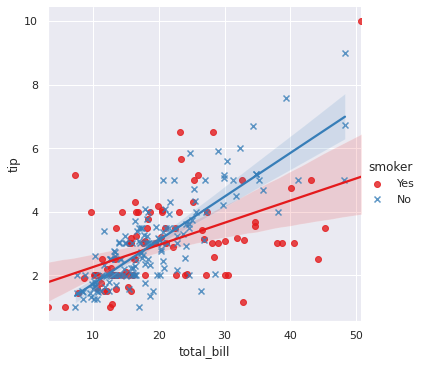

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

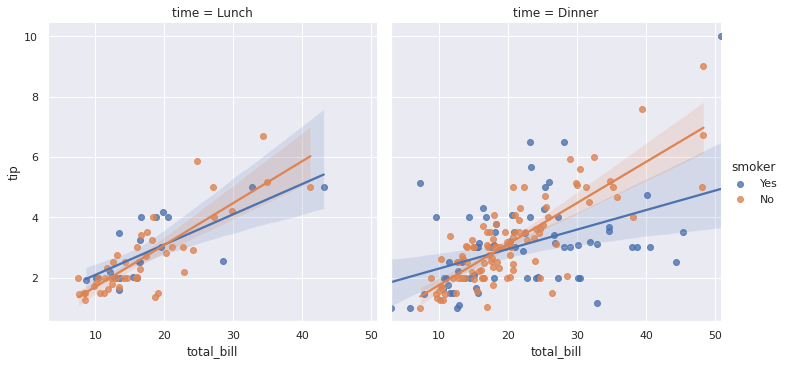

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

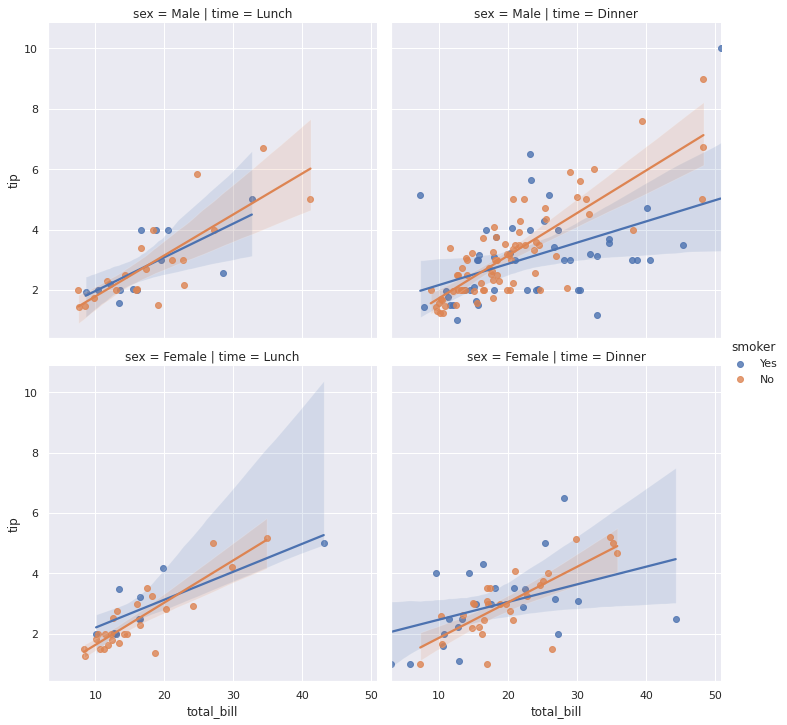

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

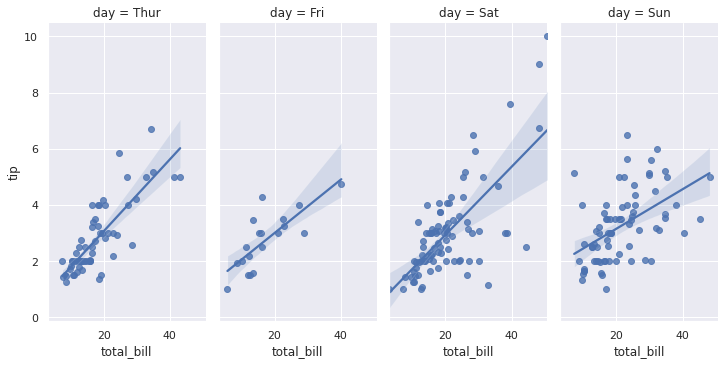

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

## Area Chart (Vanilla)

看各个时间点，各个组的数目

In [ ]:
df = pd.DataFrame({
    'weather_delay': [3, 2, 3, 9, 10, 6],
    'regulary_delay': [5, 5, 6, 12, 14, 13],
    'malfunction_delay': [20, 42, 28, 62, 81, 50],
}, index=pd.date_range(start='2018/01/01', end='2018/07/01',
                       freq='M'))
#ax = df.plot.area()
df

,weather_delay,regulary_delay,malfunction_delay
2018-01-31,3,5,20
2018-02-28,2,5,42
2018-03-31,3,6,28
2018-04-30,9,12,62
2018-05-31,10,14,81
2018-06-30,6,13,50


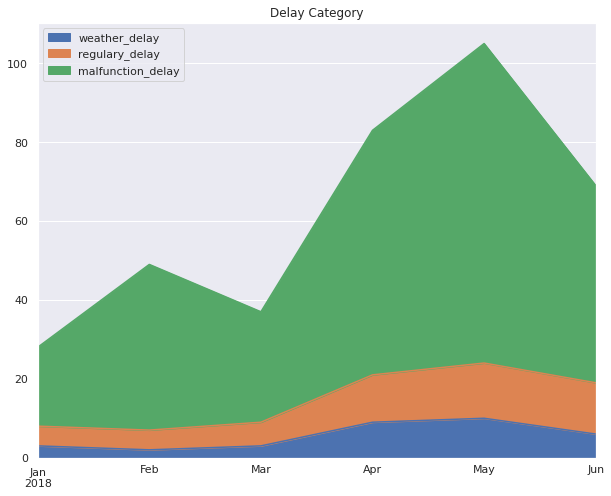

In [ ]:
df.plot(kind = 'area', title = 'Delay Category', figsize=[10,8])

## Area Chart (100% percentage)

看各个时间点，各个组的百分比    
代码来源：https://python-graph-gallery.com/255-percentage-stacked-area-chart/

In [ ]:
df = pd.DataFrame({
    'weather_delay': [3, 2, 3, 9, 10, 6],
    'regulary_delay': [5, 5, 6, 12, 14, 13],
    'malfunction_delay': [20, 42, 28, 62, 81, 50],
}, index=pd.date_range(start='2018/01/01', end='2018/07/01',
                       freq='M'))
#ax = df.plot.area()

df

,weather_delay,regulary_delay,malfunction_delay
2018-01-31,3,5,20
2018-02-28,2,5,42
2018-03-31,3,6,28
2018-04-30,9,12,62
2018-05-31,10,14,81
2018-06-30,6,13,50


In [ ]:
# 绝对数值转化成百分比
data_perc = df.divide(df.sum(axis=1), axis=0)

data_perc

,weather_delay,regulary_delay,malfunction_delay
2018-01-31,0.107143,0.178571,0.714286
2018-02-28,0.040816,0.102041,0.857143
2018-03-31,0.081081,0.162162,0.756757
2018-04-30,0.108434,0.144578,0.746988
2018-05-31,0.095238,0.133333,0.771429
2018-06-30,0.086957,0.188406,0.724638


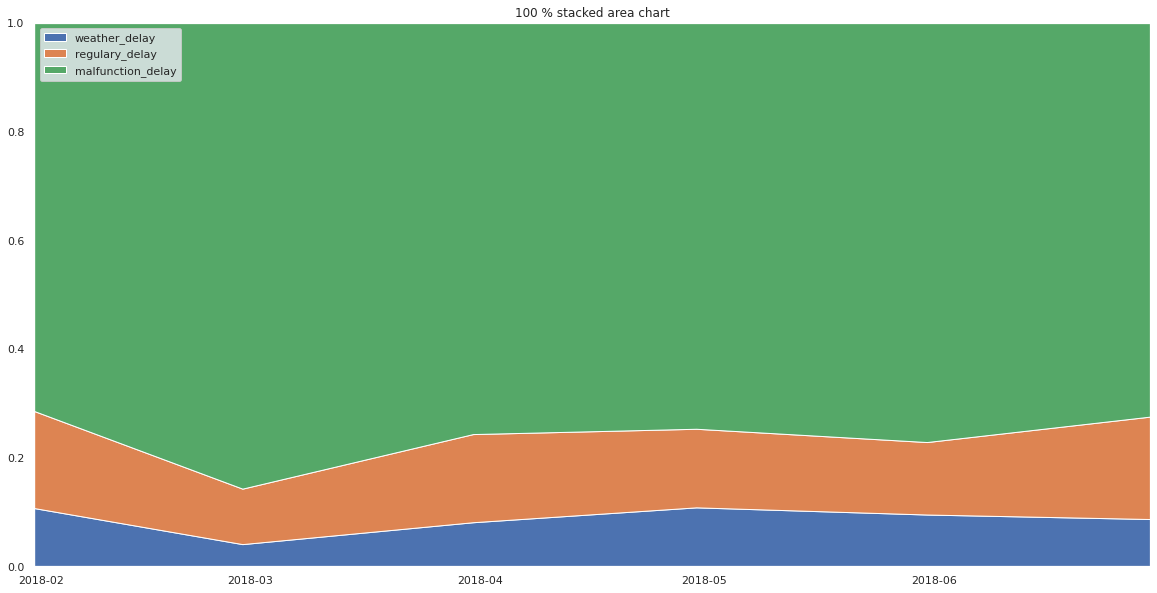

In [ ]:
plt.stackplot(data_perc.index,  data_perc["weather_delay"],  data_perc["regulary_delay"],  data_perc["malfunction_delay"], labels=data_perc.columns)
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

## PDF & CDF 

value sort -> **freq** -> pdf (freq / sum(freq)) -> cdf (cumsum of pdf)

观察大概的分布情况，主要依赖于**frequency**，从左至右数值一次变大, 可以看出从何处开始数量陡增

In [ ]:
# 方法1

# Define your series
import pandas as pd

s = pd.Series([9,5,3,5,5,4,6,5,5,8,7,3,1,2,4,6,8,9], name = 'value')
df = pd.DataFrame(s)
df.head()

,value
0,9
1,5
2,3
3,5
4,5


In [ ]:
# Get the frequency, PDF and CDF for each value in the series

# Frequency
stats_df = df \
            .groupby('value') \
            ['value'] \
            .agg('count') \
            .pipe(pd.DataFrame) \
            .rename(columns = {'value': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df

,value,frequency,pdf,cdf
0,1,1,0.055556,0.055556
1,2,1,0.055556,0.111111
2,3,2,0.111111,0.222222
3,4,2,0.111111,0.333333
4,5,5,0.277778,0.611111
5,6,2,0.111111,0.722222
6,7,1,0.055556,0.777778
7,8,2,0.111111,0.888889
8,9,2,0.111111,1.000000


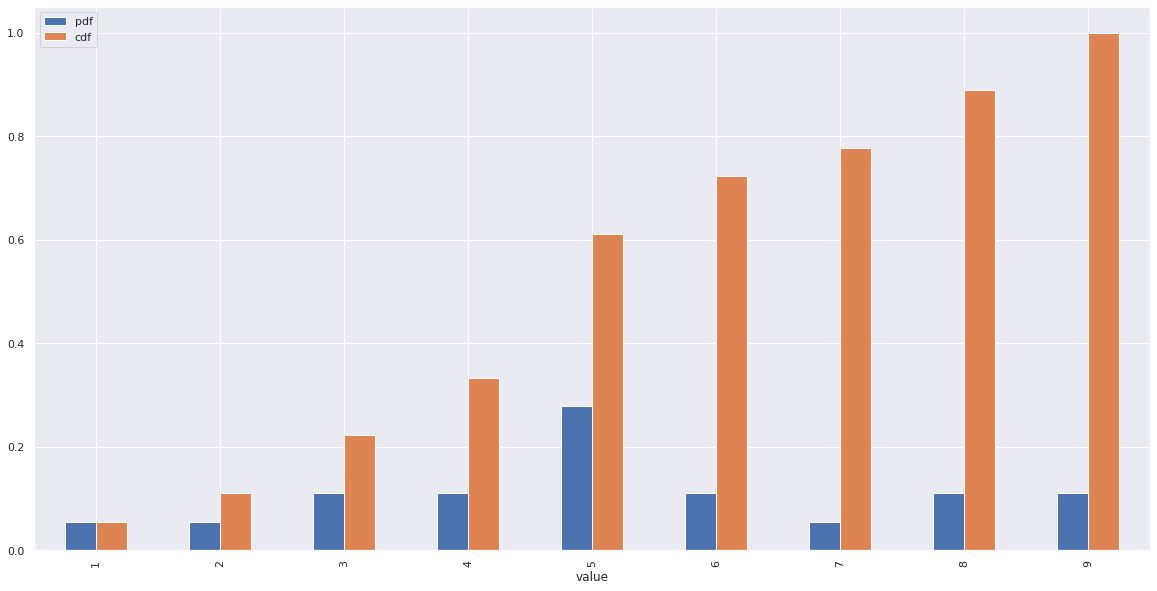

In [ ]:
# Plot the discrete Probability Mass Function and CDF.
# Technically, the 'pdf label in the legend and the table the should be 'pmf'
# (Probability Mass Function) since the distribution is discrete.

# If you don't have too many values / usually discrete case
stats_df.plot.bar(x = 'value', y = ['pdf', 'cdf'], grid = True)       # '5'的频率最大，所以pdf在x=5有突起，cdf在x=5突然陡峭

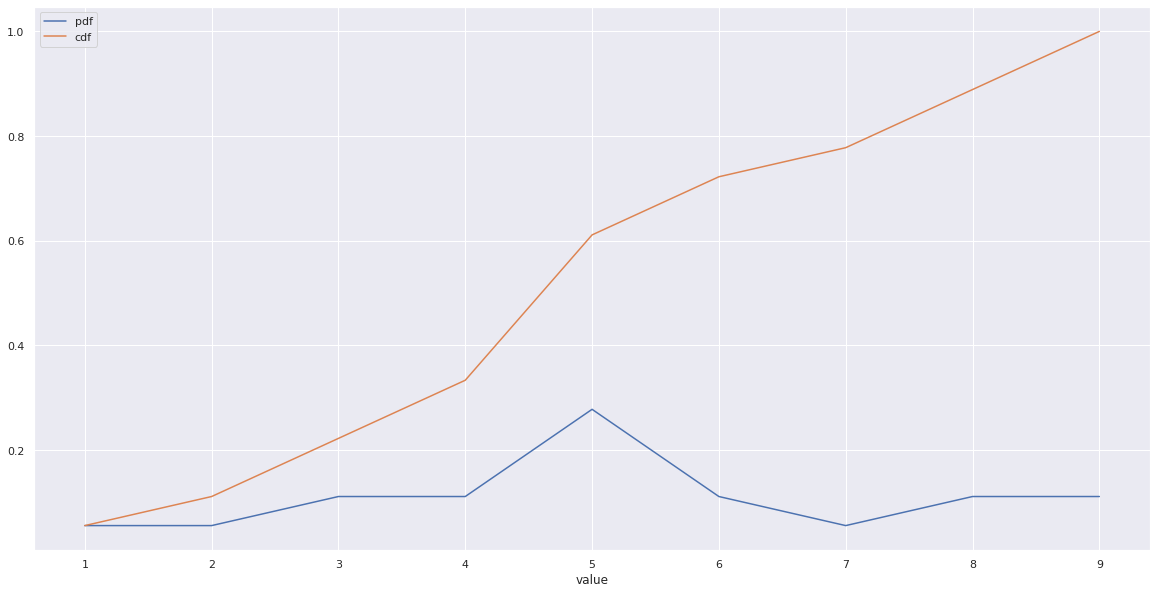

In [ ]:
# Plot the discrete Probability Mass Function and CDF.
# Technically, the 'pdf label in the legend and the table the should be 'pmf'
# (Probability Mass Function) since the distribution is discrete.

# If you don't have too many values / usually discrete case
stats_df.plot.line(x = 'value', y = ['pdf', 'cdf'], grid = True)

In [ ]:
# r = np.random.uniform(size=1000)
# hist, bins, patches = plt.hist(r, density=True)
# print((hist * np.diff(bins)).sum())

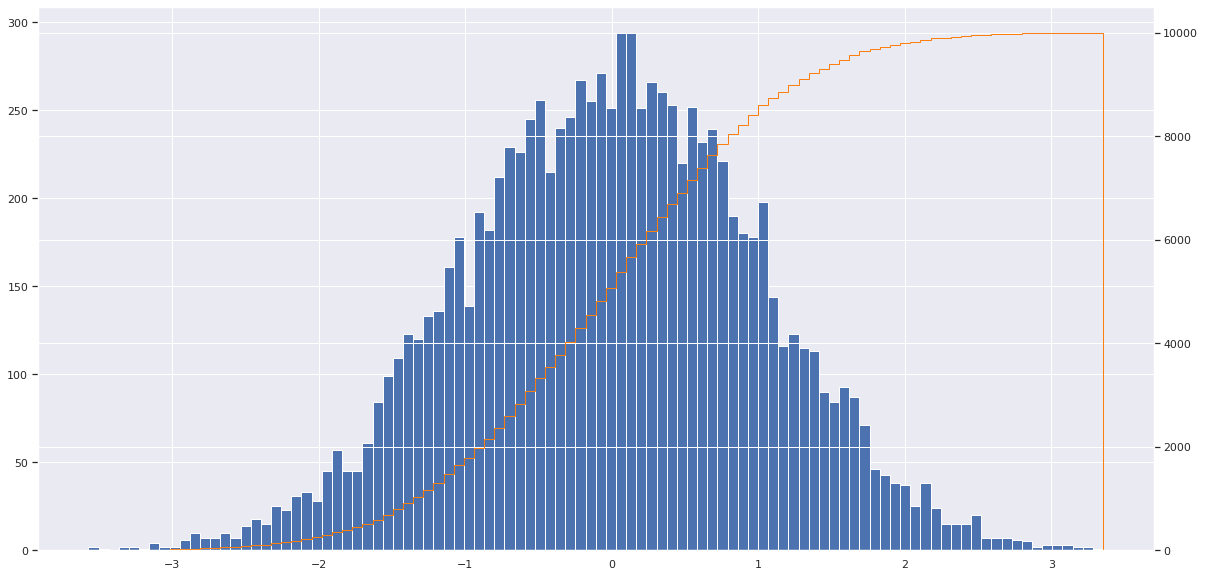

In [ ]:
# 方法2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
series = pd.Series(np.random.normal(size=10000))
fig, ax = plt.subplots()
ax2 = ax.twinx()
n, bins, patches = ax.hist(series, 
                           bins=100, 
                           #normed=False
                           )
n, bins, patches = ax2.hist(
    series, cumulative=1, histtype='step', bins=100, color='tab:orange')
#plt.savefig('test.png')

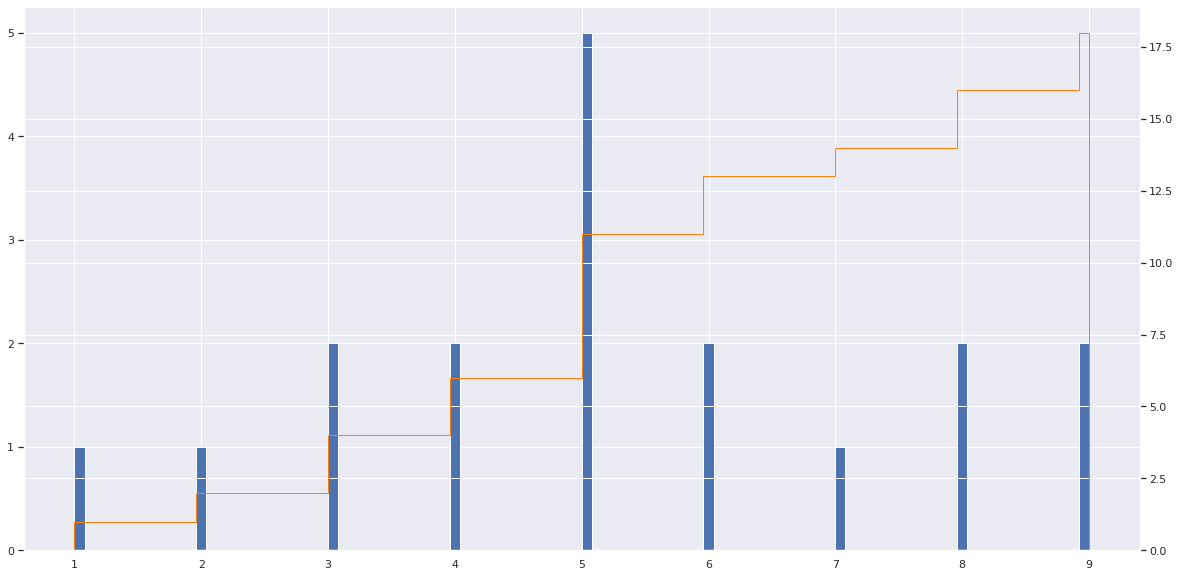

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#series = pd.Series(np.random.normal(size=10000))
series = s
fig, ax = plt.subplots()
ax2 = ax.twinx()
n, bins, patches = ax.hist(series, 
                           bins=100, 
                           #normed=False
                           )
n, bins, patches = ax2.hist(
    series, cumulative=1, histtype='step', bins=100, color='tab:orange')
#plt.savefig('test.png')

## Parallel coordinate plot (numeric feature)


我们可以用这个图，来比较每个**numeric feature**和各个label之间的相关性，可以勾画出一个大致的轮廓

参考链接：https://www.data-to-viz.com/graph/parallel.html      
参考链接：https://python-graph-gallery.com/parallel-plot/

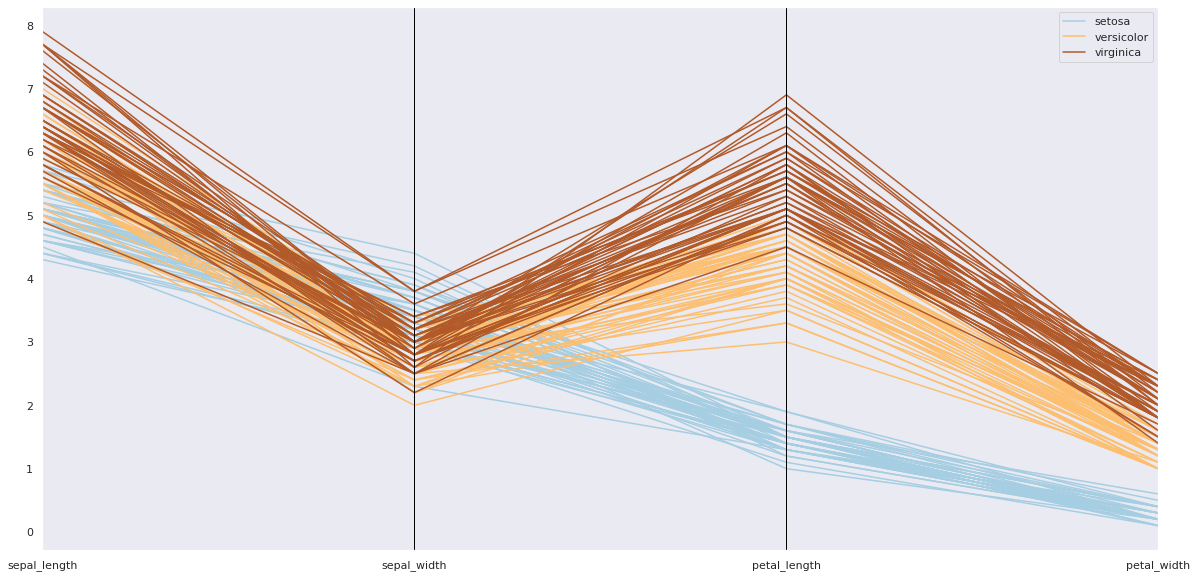

In [ ]:
# libraries
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
 
# Take the iris dataset
import seaborn as sns
data = sns.load_dataset('iris')
 
# Make the plot
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Paired"))
plt.show()


## Parallel Categories Diagram (categorical feature)

类似上面的PCP，我们可以用这个图，来比较每个categorical feature和各个label之间的相关性，可以勾画出一个大致的轮廓

来源：https://plotly.com/python/parallel-categories-diagram/

In [ ]:
import plotly.graph_objects as go
import pandas as pd

titanic_df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv")

# Create dimensions
class_dim = go.parcats.Dimension(
    values=titanic_df.Pclass,
    categoryorder='category ascending', label="Class"
)

gender_dim = go.parcats.Dimension(values=titanic_df.Sex, label="Gender")

survival_dim = go.parcats.Dimension(
    values=titanic_df.Survived, label="Outcome", categoryarray=[0, 1],
    ticktext=['perished', 'survived']
)

# Create parcats trace
color = titanic_df.Survived;
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']];

fig = go.Figure(data = [go.Parcats(dimensions=[class_dim, gender_dim, survival_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform')])

fig.show()

Radar Chart / Spider Chart

很多人不懂这个图，但是用来对比较能力值，还有比这个图更好的么?

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'name': ['ronaldo','messi','wulei','zz'],
'pass': [38, 1.5, 30, 4],
'shot': [29, 10, 9, 34],
'sprint': [8, 39, 23, 24],
'spirit': [7, 31, 33, 14]
})

df

,name,pass,shot,sprint,spirit
0,ronaldo,38.0,29,8,7
1,messi,1.5,10,39,31
2,wulei,30.0,9,23,33
3,zz,4.0,34,24,14


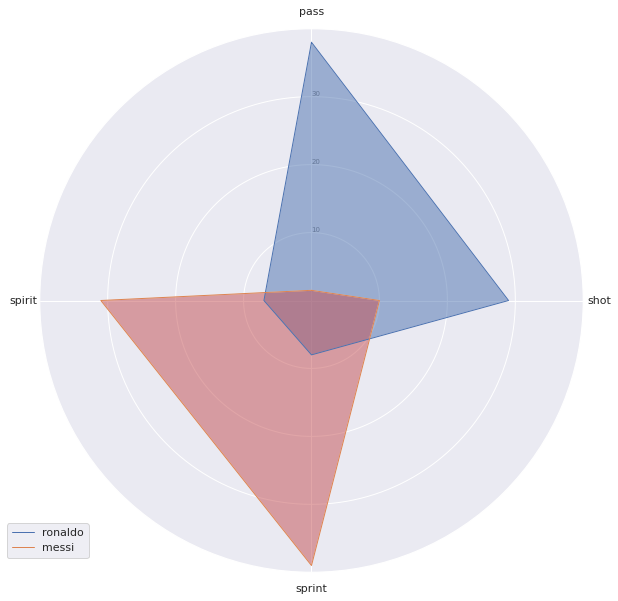

In [ ]:
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="ronaldo")
ax.fill(angles, values, 'b', alpha=0.5)
 
# Ind2
values=df.loc[1].drop('name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="messi")
ax.fill(angles, values, 'r', alpha=0.5)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


# Treemap

感觉就是现代化一点的pie chart

In [ ]:
!pip install squarify

In [ ]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
# # If you have 2 lists
# squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], alpha=.7 )
# plt.axis('off')
# plt.show()
 
# If you have a data frame?
import pandas as pd
df = pd.DataFrame({'Mkt Capital':[8,10,4,7], 
                   'Company':["Google", "Apple", "Facebook", "Microsoft"]})

df

,Mkt Capital,Company
0,8,Google
1,10,Apple
2,4,Facebook
3,7,Microsoft


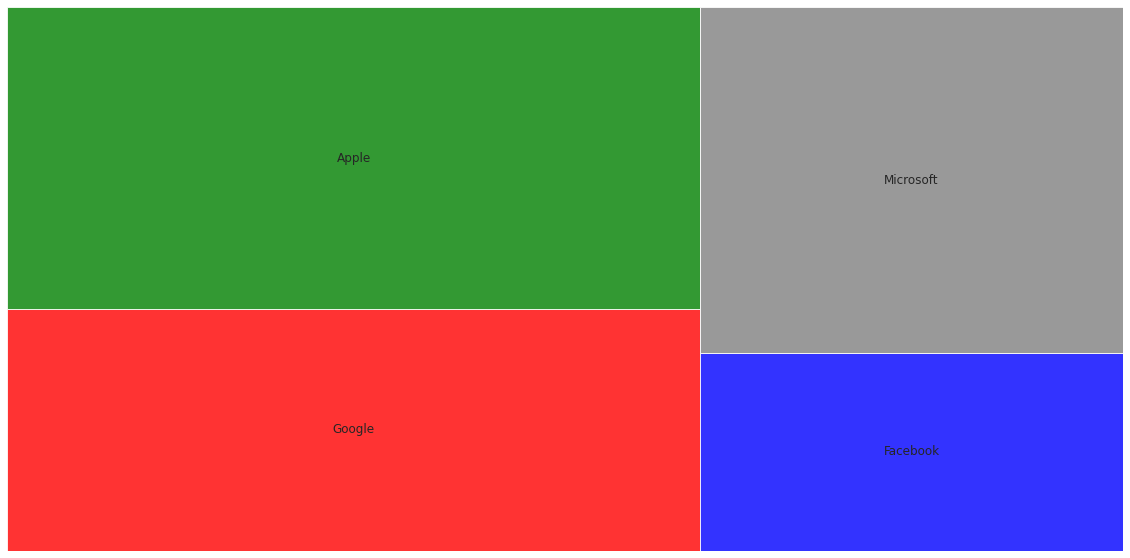

In [ ]:
squarify.plot(sizes=df['Mkt Capital'], 
              label=df['Company'], 
              color=["red","green","blue", "grey"],
              alpha=.8 )
plt.axis('off')
plt.show()

# Categorical data

## Bar Chart (Horizontal)

In [ ]:
download_url = ("https://raw.githubusercontent.com/fivethirtyeight/"
"data/master/college-majors/recent-grads.csv"
   )

df = pd.read_csv(download_url)

In [ ]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

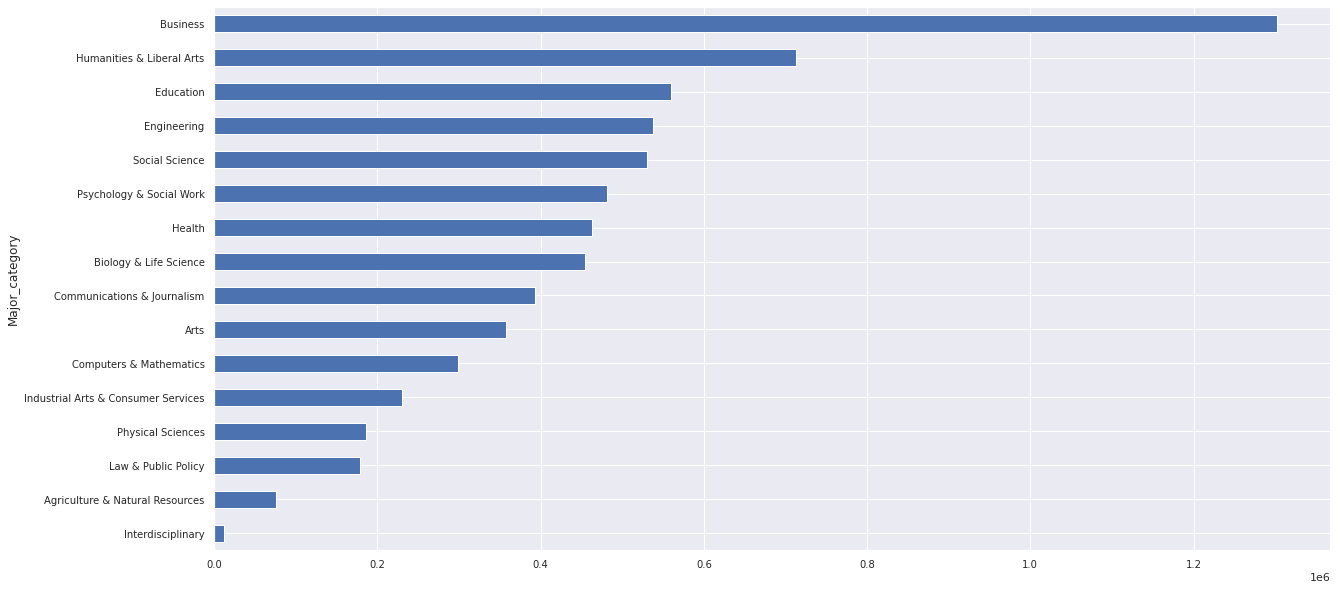

In [ ]:
cat_totals.plot(kind="barh", fontsize=10)

## Pie Chart

查看每组比例

In [ ]:
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]

# Adding a new item "Other" with the sum of the small categories
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals

Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Other                                    87916.0
dtype: float64

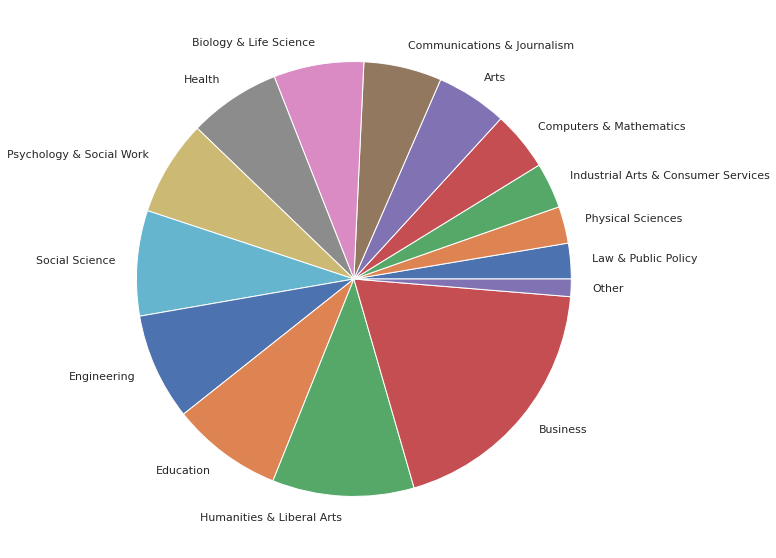

In [ ]:
big_cat_totals.plot(kind="pie", label="")

## Hist Chart

In [ ]:
df[df["Major_category"] == "Engineering"]["Median"]

0     110000
1      75000
2      73000
3      70000
4      65000
5      65000
8      60000
9      60000
10     60000
11     60000
12     60000
13     60000
14     58000
15     57100
16     57000
17     56000
18     54000
22     52000
23     52000
25     50000
28     50000
30     50000
31     50000
33     50000
38     46000
50     44000
58     40000
65     40000
66     40000
Name: Median, dtype: int64

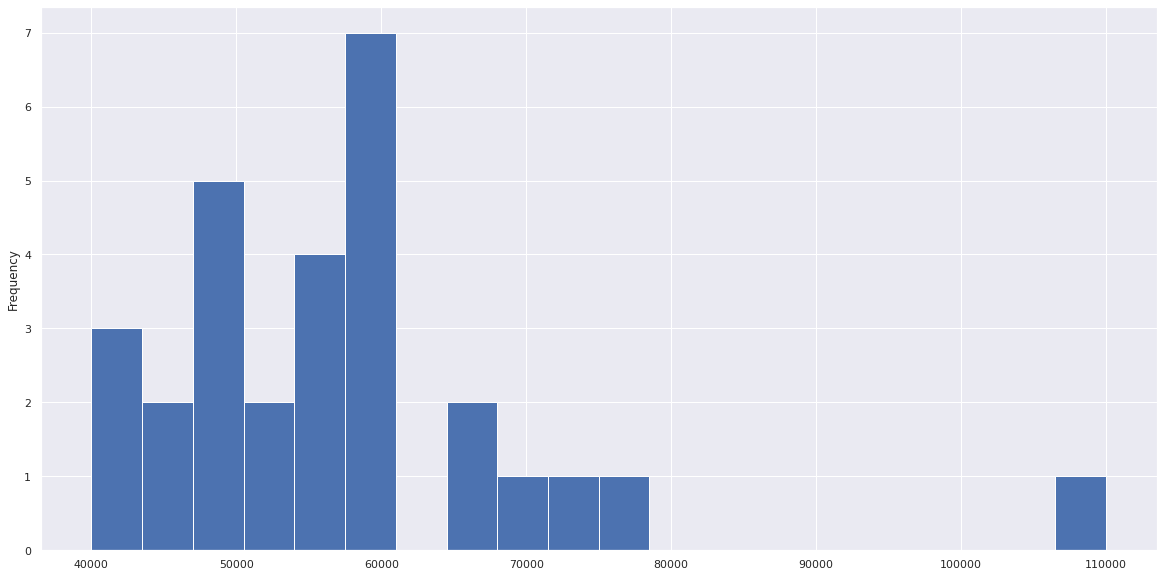

In [ ]:
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist", bins = 20)

In [ ]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = df['S1_Joy'].interpolate().values
d2 = df['S2_Joy'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

KeyError: ignored

### Distribution by Groups

在classification中，最喜欢做的就是各个group和label的比较

In [7]:
df_data = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_data.loc[df_data.Churn=='No','Churn'] = 0 
df_data.loc[df_data.Churn=='Yes','Churn'] = 1

In [9]:
df_plot = df_data.groupby('gender').Churn.apply(np.mean).reset_index()

df_plot

,gender,Churn
0,Female,0.269209
1,Male,0.261603


In [11]:
import plotly.graph_objs as go

plot_data = [
    go.Bar(
        x=df_plot['gender'],
        y=df_plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Gender',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()